In [11]:
# Import Libraries
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
import nltk

import pickle

In [12]:
from google.colab import files
data_to_load = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews (1).tsv


In [13]:
# Import Data
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', error_bad_lines=False, encoding="latin-1")

In [14]:
# Reveal Top 10 Rows of the dataset, positive reviews have been given a value of 1, negative are 0
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [15]:
# Display shape of the table
df.shape

(1000, 2)

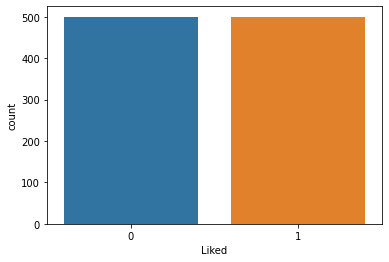

In [16]:
dfcount = sns.countplot(x="Liked", data=df)

In [17]:
from wordcloud import WordCloud, STOPWORDS

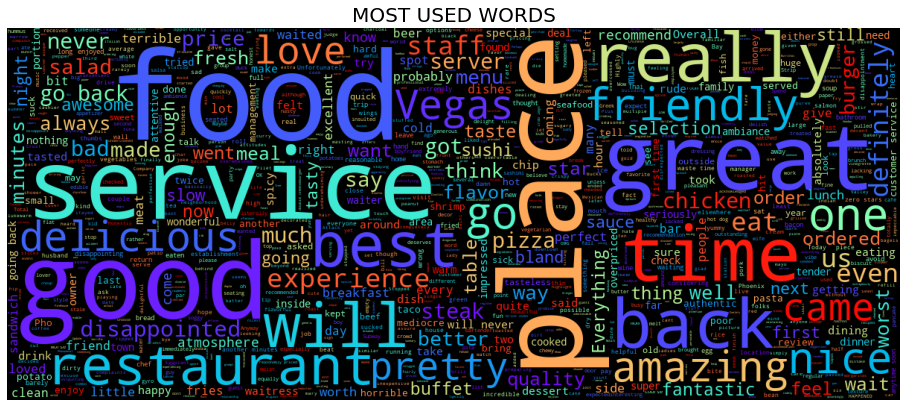

In [18]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=1000,
                            width=1200,stopwords=STOPWORDS,
                            height=500
                            ).generate(" ".join(df['Review']))
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'rainbow'))
plt.axis('off')
plt.show()

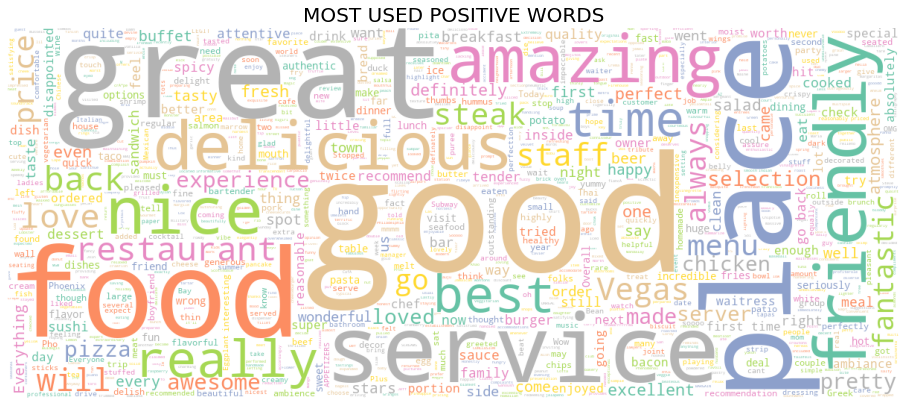

In [19]:
#Wordcloud for positive reviews

positive_reviews=df.loc[df['Liked']==1]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='white',max_words=1000,
                            width=1200,stopwords=STOPWORDS,
                            height=500
                            ).generate(" ".join(positive_reviews)) 
plt.title("MOST USED POSITIVE WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Set2'))
plt.axis('off')
plt.show()

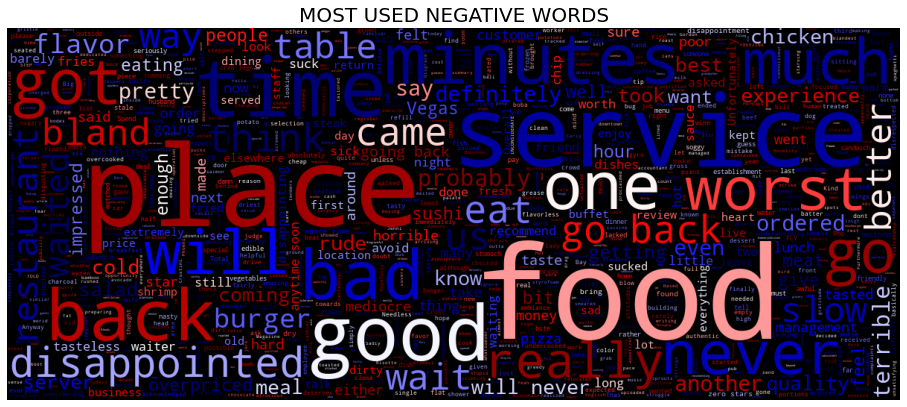

In [20]:

negative_reviews=df.loc[df['Liked']==0]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=1000,
                            width=1200,stopwords=STOPWORDS,
                            height=500
                            ).generate(" ".join(negative_reviews)) 
plt.title("MOST USED NEGATIVE WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'seismic'))
plt.axis('off')
plt.show()

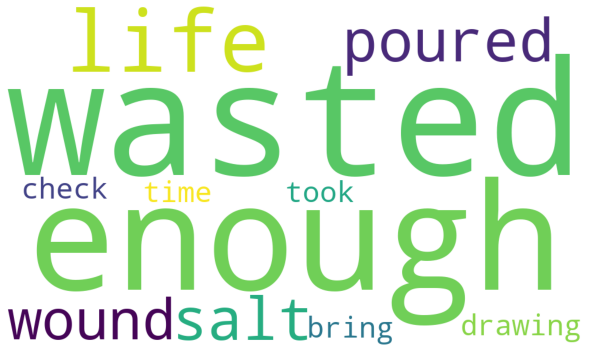

In [21]:
comment_words = ' '

# iterate through the dataframe 
for val in df.Review: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Convert each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 1000, height = 600, 
            background_color ='white',  
            min_font_size = 8).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [22]:
# Download the stopwords package from nltk, import packages to remove stopwords and stem
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = stopwords.words('english')
stop_words.remove('not')
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stop_words)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# see 10 words form the corpus
corpus[0:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [40]:
#cv1 stands for CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(max_features=1500)
X = cv1.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [41]:
#Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [42]:
#Fitting Random Forest Classification to training test
#rf stands for random forest
#cv stands for cross validation
#cm stands for confusion matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy')  
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
y_pred_rf = rf.predict(X_test)

print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[0.73134328 0.8358209  0.73134328 0.80597015 0.76119403 0.8358209
 0.8358209  0.76119403 0.84848485 0.77272727 0.86363636 0.8030303 ]
The accuracy of the RandomForestClassifier is 77.0
[[88  9]
 [37 66]]


Text(69.0, 0.5, 'Actual values')

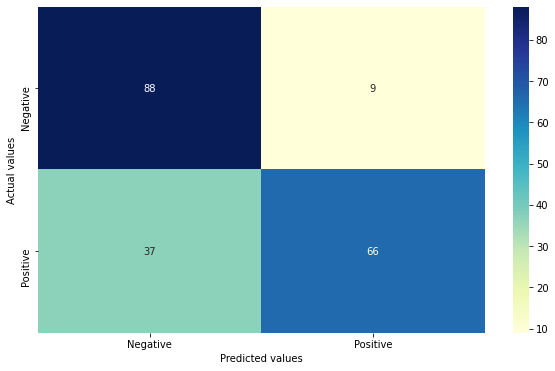

In [43]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        97
           1       0.88      0.64      0.74       103

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.77       200
weighted avg       0.79      0.77      0.77       200



In [45]:
# Fitting Logistic Regression to the Training set
#lg stands for logistic regression 

from sklearn import linear_model
lg = linear_model.LogisticRegression(C=1.5)
lg.fit(X_train, y_train)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = lg.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)
print('Logistic Regression Accuracy is',metrics.accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[80 17]
 [27 76]]
Logistic Regression Accuracy is 78.0


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        97
           1       0.82      0.74      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



Text(69.0, 0.5, 'Actual values')

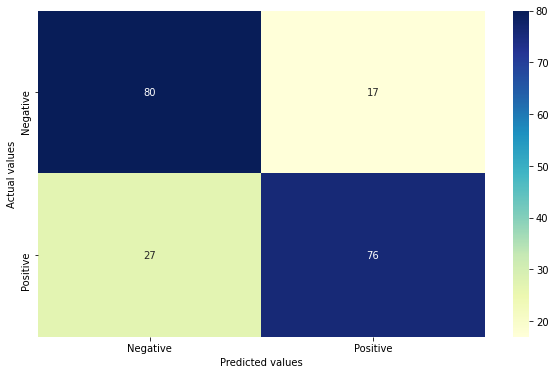

In [49]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [50]:
# Fitting Naive Bayes to the Training set
# mnb stands for MultinomialNB
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [51]:
y_pred = mnb.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm1)
print('Naive Bayes Model Accuracy is',metrics.accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
 [[74 23]
 [19 84]]
Naive Bayes Model Accuracy is 79.0


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        97
           1       0.79      0.82      0.80       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



Text(69.0, 0.5, 'Actual values')

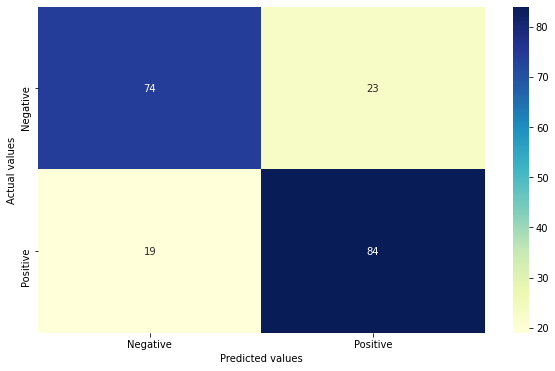

In [54]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm1, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [55]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv1, open('cv1.pkl', 'wb'))

In [60]:
# Creating a pickle file for Random Forrest model
pickle.dump(rf, open('rfmodel.pkl', 'wb'))

In [61]:
# Creating a pickle file for Logistic Regression model
pickle.dump(lg, open('lgmodel.pkl', 'wb'))

In [62]:
# Creating a pickle file for the Multinomial Naive Bayes model
pickle.dump(mnb, open('mnbmodel.pkl', 'wb'))

In [65]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv1.transform([final_review]).toarray()
  return mnb.predict(temp)

In [66]:
# Predicting values
sample_review = 'Food needs improvement'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [67]:
# Predicting values
sample_review = 'Good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [68]:
# Predicting values
sample_review = 'eghsnjrdjudn fjdrtkjfcnjxfdrjrjndfx bfrhurdjrfjfrjrdjdxcn chrdhrdjndfxc'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
